### Random Forest

A Random Forest is an example of ensemble learning which uses bagging approach. Bagging is used to create an ensemble of trees where multiple training sets are generated with replacement. In the bagging technique, a data set is divided into N samples using randomized sampling. Then, using a single learning algorithm a model is built on all samples. Later, the resultant predictions are combined using voting or averaging in parallel.

![random_forest](images/random_forest.png)

### How does it work?
Let’s consider that we have a total of m features.

1. Randomly select “K” features from total “m” features where k << m
2. Among the “K” features, calculate the node “d” using the best split point
3. Split the node into child nodes using the best split methods
4. Repeat the steps from 1 to 3 until “l” number of nodes has been reached (Stopping criteria has been reached)
5. Build forest by repeating steps 1 to 4 for “n” number times to create “n” number of trees

In the next stage, with the random forest classifier created, we will make the prediction. The random forest prediction pseudocode is shown below:
1. Takes the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome (target)
2. Calculate the votes for each predicted target
3. Consider the high voted predicted target as the final prediction from the random forest algorithm

### Hyperparameters

* **n_estimators**: Number of trees in the forest 
* **max_features**: Max number of features considered for splitting a node<br>

and all the decision tree hyper parameters are applicable here.

### Implementation in sklearn

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("titanic_processed.csv")

### Preparing data for sklearn

In [3]:
train_col = ['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male','Embarked_Q', 'Embarked_S', 'family_members_1', 
             'family_members_2','family_members_>=3']
target_col = 'Survived'

In [4]:
X = df[train_col]
y = df[target_col]

In [5]:
X.shape, y.shape

((891, 10), (891,))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 10), (268, 10), (623,), (268,))

### Creating Random Forest classifier 

In [10]:
#Import Random Forest Model

from sklearn.ensemble import RandomForestClassifier

In [11]:
#Create a RandomForest Classifier
clf_rf = RandomForestClassifier(n_estimators=21, max_features = 3, max_depth = 3, random_state = 1)

# Fitting the classifier over training data
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=3, n_estimators=21,
                       random_state=1)

In [12]:
# Predicting on the train dataset
y_pred_train = clf_rf.predict(X_train)
y_pred_train_prob = clf_rf.predict_proba(X_train)[:, 1]

In [13]:
# Predicting on the test dataset
y_pred = clf_rf.predict(X_test)
y_pred_prob = clf_rf.predict_proba(X_test)[:, 1]

In [14]:
from sklearn import metrics

In [15]:
# Custom function to Evaluate Model performance
def model_evaluation(y_true, y_prob, threshold = 0.5):
    y_pred = (y_prob>=threshold).astype(int)
    print("Accuracy: ", round(metrics.accuracy_score(y_true, y_pred)*100,2), "%")
    print("Recall: ", round(metrics.recall_score(y_true, y_pred)*100,2), "%")
    print("Precision: ", round(metrics.precision_score(y_true, y_pred)*100,2), "%")
    print("F1-score: ", round(metrics.f1_score(y_true, y_pred)*100,2), "%")

In [16]:
# Model evaluation on training dataset

model_evaluation(y_train, y_pred_train_prob)

Accuracy:  82.99 %
Recall:  60.17 %
Precision:  90.85 %
F1-score:  72.4 %


In [17]:
# Model evaluation on testing dataset

model_evaluation(y_test, y_pred_prob)

Accuracy:  80.6 %
Recall:  62.16 %
Precision:  87.34 %
F1-score:  72.63 %


### Variable/feature Importance

In [18]:
# Calculate feature importances

clf_rf.feature_importances_

array([0.11719474, 0.11820712, 0.02663979, 0.17676   , 0.44229531,
       0.00423989, 0.0380965 , 0.01957614, 0.02497524, 0.03201529])

In [19]:
# Calculate feature importances
importances = clf_rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

In [21]:
%matplotlib inline

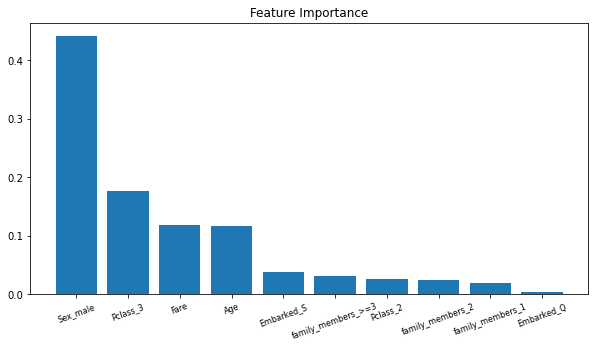

In [22]:
import matplotlib.pyplot as plt

# Barplot: Add bars
plt.figure(figsize = (10,5))
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=20, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

### Advantages

1. Improving the accuracy of the model and works in most of the cases. 
2. Quite robust to outliers and indifferent to non-linear features
3. Lower risk of overfitting
4. Random forest models are more robust and stable thus ensuring good performance on the test cases in most scenarios. 


### Disadvantages
1. Model interpretability: Random forest models are not all that interpretable; they are like black boxes.
2. For very large data sets, the size of the trees can take up a lot of memory 
